# Heart Disease Dataset

## 1. Load in the data. The target column should be considered as whether a patient will develop heart disease or not.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## The dataset columns:

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.shape

(303, 14)

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
duplicateData = data.duplicated().any()
print(duplicateData)
data = data.drop_duplicates()
data.shape

True


(302, 14)

In [8]:
for column in data.columns:
  col = data[column]
  print(f'{column}  unique values = ', col.nunique())

age  unique values =  41
sex  unique values =  2
cp  unique values =  4
trestbps  unique values =  49
chol  unique values =  152
fbs  unique values =  2
restecg  unique values =  3
thalach  unique values =  91
exang  unique values =  2
oldpeak  unique values =  40
slope  unique values =  3
ca  unique values =  5
thal  unique values =  4
target  unique values =  2


## 2. Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.

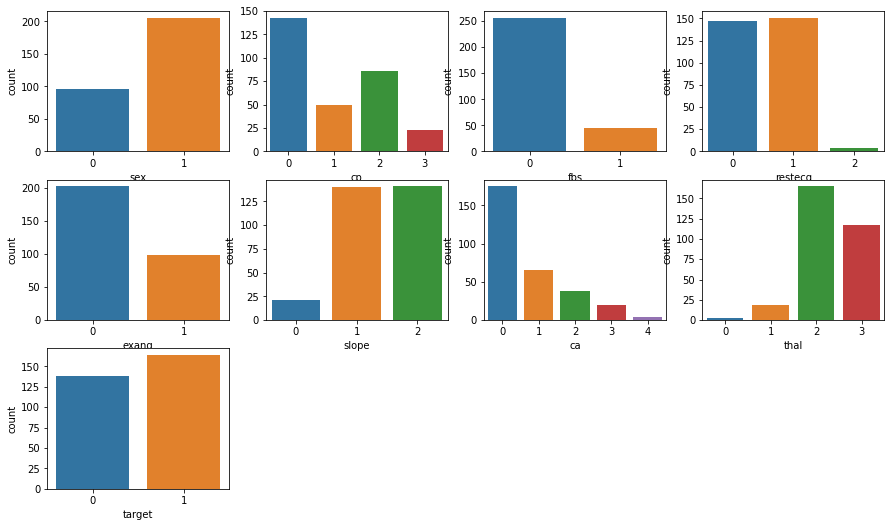

In [9]:
num = 0

plt.figure(figsize=(15,15))
for column in data.columns:
    col = data[column]
    if col.nunique() <= 10:
        ax = plt.subplot(541 + num)
        ax = sns.countplot(x = col)
        num+=1

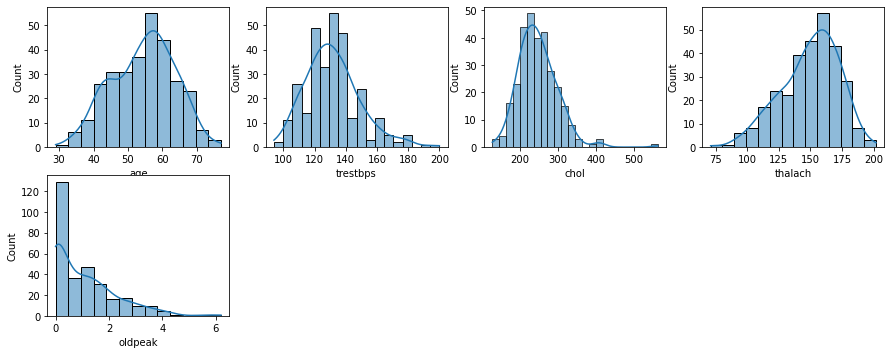

In [10]:
num = 0

plt.figure(figsize=(15,15))
for column in data.columns:
    col = data[column]
    if col.nunique() > 10:
        ax = plt.subplot(541 + num)
        ax = sns.histplot(col, kde=True)
        num+=1

In [11]:
continous = []
for column in data.columns:
  col = data[column]
  if col.nunique() >= 10:
    continous.append(column)

continous  

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
discrete = []
for column in data.columns:
  col = data[column]
  if col.nunique() < 10:
    discrete.append(column)

discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

## 3. Identify any presence of outliers in the continuous features and resolve them using the IQR method.

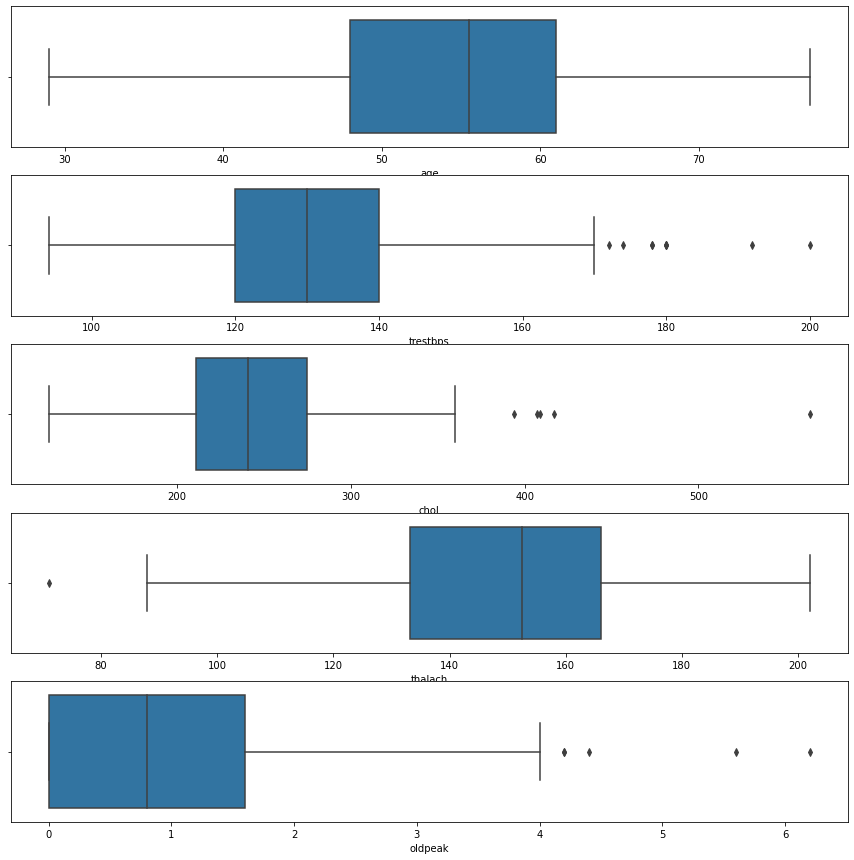

In [13]:
num = 0

plt.figure(figsize=(15,15))
for column in continous:
    col = data[column]
    ax = plt.subplot(511 + num)
    ax = sns.boxplot(col)
    num+=1    

In [14]:
outlier = data[['trestbps','chol','thalach','oldpeak']]


def Outliers(i):
        Q1 = i.quantile(0.25)
        Q3 = i.quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)
        return lower_limit, upper_limit

Outliers(outlier)

(trestbps     90.000
 chol        115.375
 thalach      84.125
 oldpeak      -2.400
 dtype: float64,
 trestbps    170.000
 chol        370.375
 thalach     215.125
 oldpeak       4.000
 dtype: float64)

In [15]:
for column in outlier:
    lower_limit, upper_limit = Outliers(outlier[column])
    data = data.loc[(data[column]>= lower_limit) & (data[column]< upper_limit)]
    

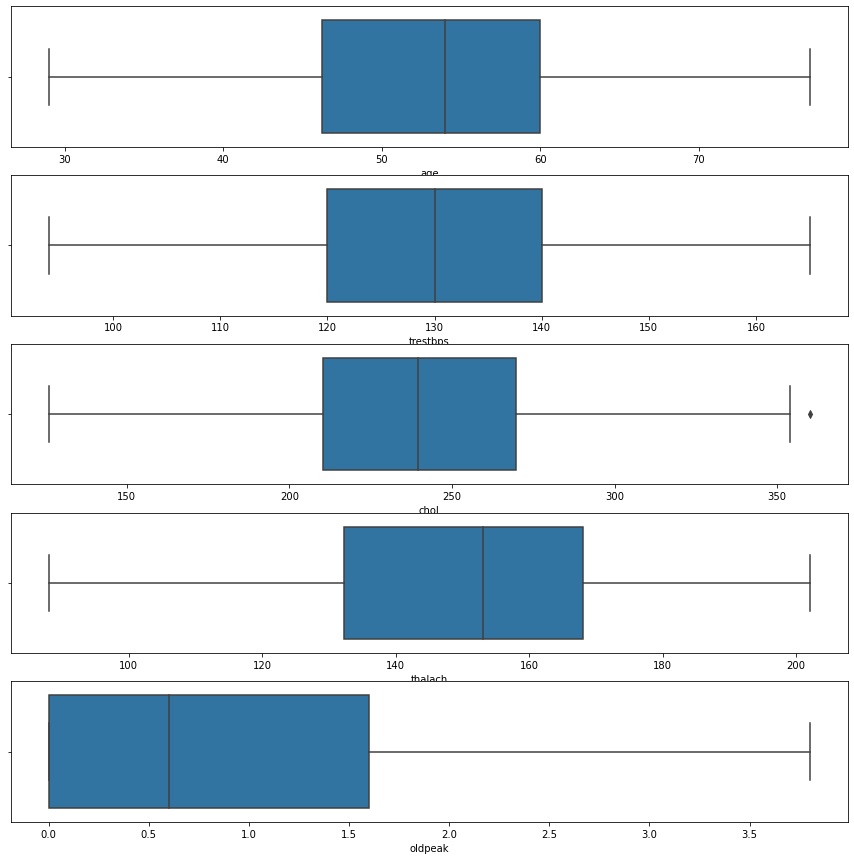

In [16]:
num = 0

plt.figure(figsize=(15,15))
for column in continous:
    col = data[column]
    ax = plt.subplot(511 + num)
    ax = sns.boxplot(col)
    num+=1 

## 4. Binned the continuous column values apart from the column ‘oldpeak’ 

In [17]:
continous.remove('oldpeak')
for column in continous:
    
    data[column] = pd.cut(data[column], bins=4, precision=0, labels=False)
    
data.head()    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2,1,3,2,1,1,0,2,0,2.3,0,0,1,1
1,0,1,2,2,2,0,1,3,0,3.5,0,0,2,1
2,0,0,1,2,1,0,0,2,0,1.4,2,0,2,1
3,2,1,1,1,1,0,1,3,0,0.8,2,0,2,1
4,2,0,0,1,3,0,1,2,1,0.6,2,0,2,1


## 5. Separate the features from the labels and use the most appropriate feature selection technique(s).

In [18]:
X = data.drop('target', axis=1)
y = data.target


## 6. Slice the data and scale the features

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
train_sample = StandardScaler().fit_transform(X_train)
test_sample = StandardScaler().fit_transform(X_test)



## 8. Using at least 4 classification methods, identify the best machine learning model using their training and testing accuracy scores.


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [22]:
models = {"LogisticRegression" : LogisticRegression(), "KNeighbors" : KNeighborsClassifier(), "DecisionTree" : DecisionTreeClassifier(), "RandomForest" : RandomForestClassifier()}

In [23]:
scores = {}

for key, model in models.items():
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)
    
scores    

{'LogisticRegression': 0.875,
 'KNeighbors': 0.8571428571428571,
 'DecisionTree': 0.8035714285714286,
 'RandomForest': 0.875}

## 9. Hyper parameter tune the best model using grid search to identify the best performing model.

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
reg_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "solver": ["liblinear","sag","saga","newton-cg","lbfgs"]}

grid_logistic = GridSearchCV(LogisticRegression(), reg_grid)

grid_logistic.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear', 'sag', 'saga', 'newton-cg',
                                    'lbfgs']})

In [26]:
grid_logistic.best_estimator_

LogisticRegression(C=1, solver='saga')

In [27]:
model = LogisticRegression(C=0.7278953843983146, solver='saga',random_state=0).fit(X_train, y_train)

y_prediction = model.predict(X_test)
y_prediction


array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

## 10. Redefine the model instance based on the grid search results, train it and evaluate it using:
   ### a. A classification report

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.88      0.90      0.89        31

    accuracy                           0.88        56
   macro avg       0.88      0.87      0.87        56
weighted avg       0.88      0.88      0.87        56



###   b. A visual representation and well labelled confusion matrix.


<AxesSubplot:>

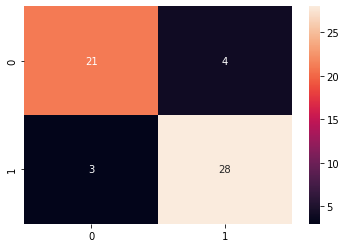

In [30]:
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True)

## 12. Save the model as ‘classification_model’.

In [31]:
import pickle
model = LogisticRegression().fit

filename = 'classification_model'
pickle.dump(model, open(filename, 'wb'))